In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

In [3]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [5]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [7]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


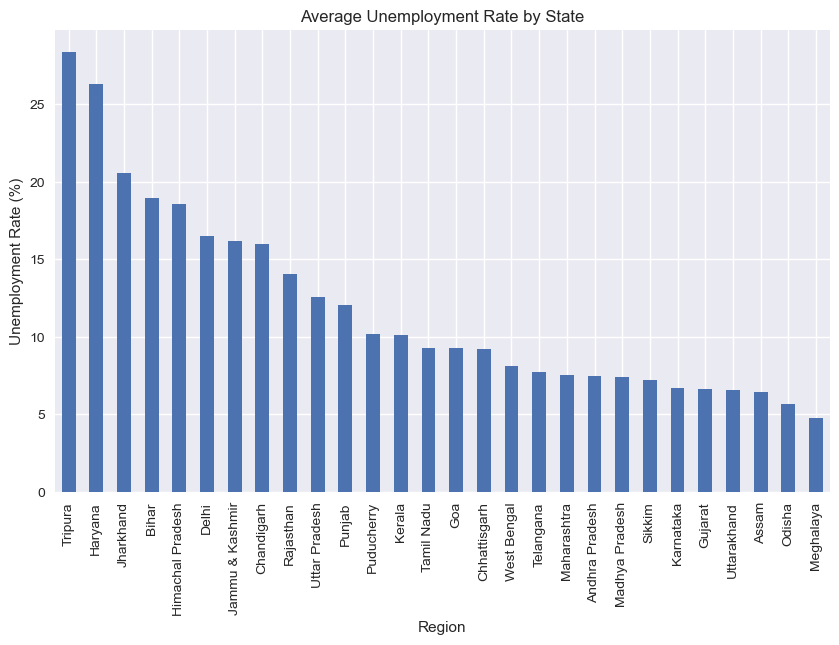

In [9]:
state_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
state_unemployment.plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.ylabel("Unemployment Rate (%)")
plt.show()

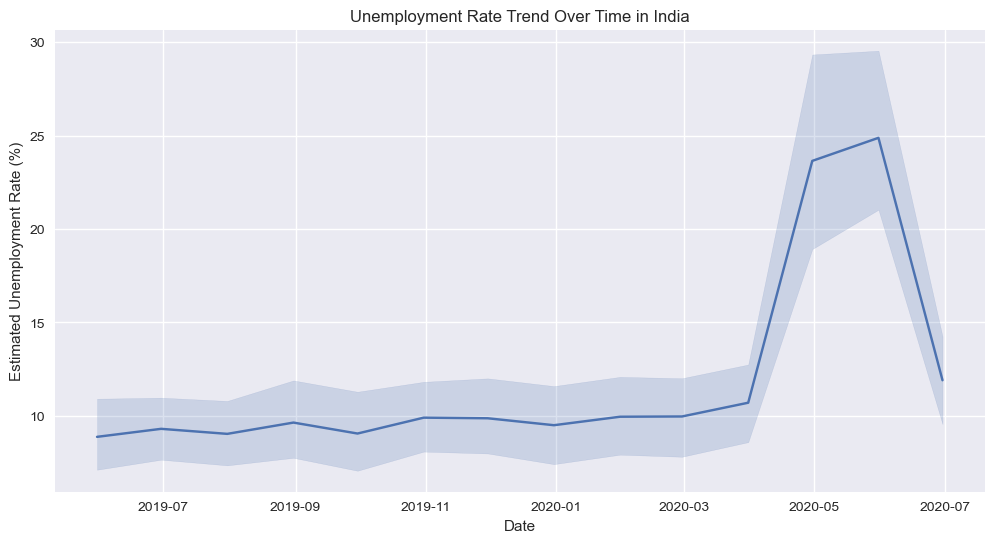

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate Trend Over Time in India")
plt.show()

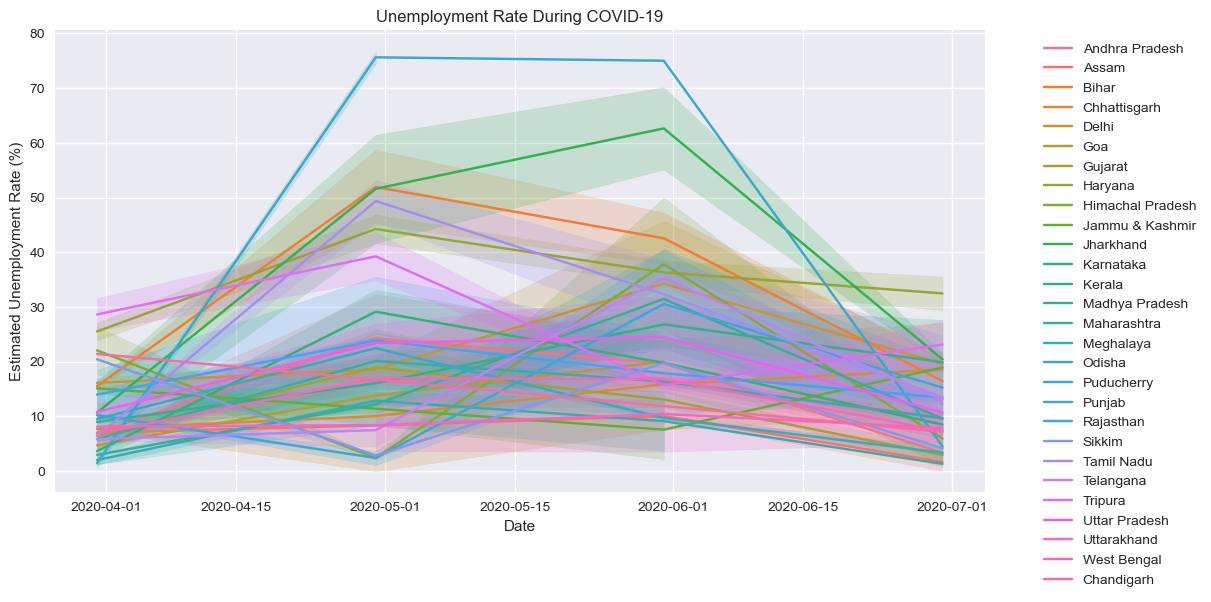

In [11]:
covid_period = df[df['Date'] >= '2020-03-01']

plt.figure(figsize=(12,6))
sns.lineplot(data=covid_period, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate During COVID-19")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [12]:
print("""
Conclusion:
- Unemployment increased sharply during the COVID-19 period.
- Urban areas were more affected than rural areas.
- Certain states consistently show higher unemployment rates.
- Data-driven insights can help policymakers design better employment strategies.
""")


Conclusion:
- Unemployment increased sharply during the COVID-19 period.
- Urban areas were more affected than rural areas.
- Certain states consistently show higher unemployment rates.
- Data-driven insights can help policymakers design better employment strategies.

